In [3]:
import matplotlib.pyplot as plt
from IPython.display import display
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
%matplotlib inline

In [4]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression().fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))



Training set score: 0.955
Test set score: 0.958


/home/irmorales/Projects/IntroductionToMLWithPython/Source/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [7]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg100.score(X_test, y_test)))

Training set score: 0.972
Test set score: 0.965


In [10]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg001.score(X_test, y_test)))


Training set score: 0.934
Test set score: 0.930


/home/irmorales/Projects/IntroductionToMLWithPython/Source/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


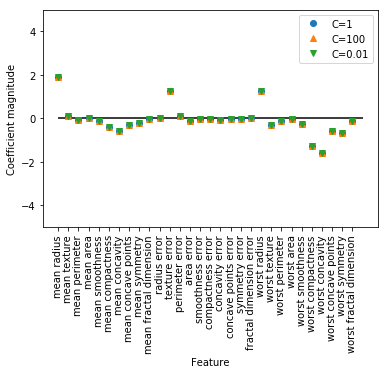

In [12]:
# Taking a look at the coefficients
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg.coef_.T, '^', label="C=100")
plt.plot(logreg.coef_.T, 'v', label="C=0.01")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.legend()

/home/irmorales/Projects/IntroductionToMLWithPython/Source/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/irmorales/Projects/IntroductionToMLWithPython/Source/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Training accuracy of l1 logreg with C=0.001: 0.91
Test accuracy of l1 logreg with C=0.001: 0.92


/home/irmorales/Projects/IntroductionToMLWithPython/Source/venv/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/irmorales/Projects/IntroductionToMLWithPython/Source/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Training accuracy of l1 logreg with C=1.000: 0.96
Test accuracy of l1 logreg with C=1.000: 0.96
Training accuracy of l1 logreg with C=100.000: 0.99
Test accuracy of l1 logreg with C=100.000: 0.98


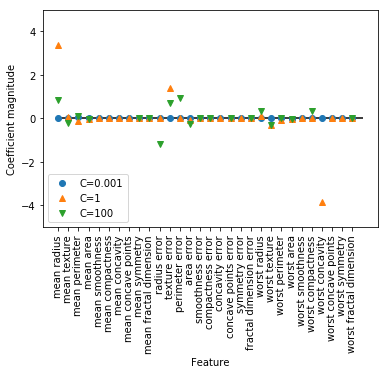

In [14]:
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C, penalty="l1").fit(X_train, y_train)
    print("Training accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
        C, lr_l1.score(X_train, y_train)))
    print("Test accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
        C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={}".format(C))

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.ylim(-5, 5)
plt.legend(loc=3)
